<a href="https://colab.research.google.com/github/etemadism/Courses/blob/main/01_One_Sample_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### One-Sample Analysis: Parametric and Non-Parametric

This **Google Colab notebook**, authored by **A. Etemadi**, is designed for a **Statistics class** and provides a comprehensive guide to performing **one-sample hypothesis testing** in Python. It is structured into two practical examples:

---

#### **1. Parametric Example (Blood Pressure)**

This section demonstrates the implementation of a **one-sample t-test** using blood pressure data.  
- **Scenario:** The mean systolic blood pressure in the general population is assumed to be **120 mmHg**. A sample of **30 patients** was measured after a new drug treatment to test if their blood pressure significantly differs from the population mean.  
- The analysis includes:
  - Calculation of the sample mean and standard deviation.
  - **Normality check** using the **Shapiro-Wilk test** (since \( n < 50 \)).
  - Conducting a **one-sample t-test** to assess the null hypothesis against the alternative hypothesis .  

---

#### **2. Non-Parametric Example (CO2 Concentration)**

This section highlights the use of the **Wilcoxon signed-rank test** for non-normally distributed data.  
- **Scenario:** The global mean atmospheric CO2 concentration is estimated to be **420 ppm**. A sample of **60 regional measurements** is tested to determine if the mean significantly differs from the global standard.  
- The analysis includes:
  - **Normality check** using the **Kolmogorov-Smirnov test** (since \( n > 50 \)).
  - Applying the **Wilcoxon signed-rank test** due to non-normality.

---


By the end of this notebook, students will gain practical experience with Python-based statistical hypothesis testing, equipping them for data-driven decision-making in diverse scientific fields.

### Access the Datasets:
The datasets used in these examples can be found on the Etemadism GitHub repository, along with the Python code. Students are encouraged to download the data and explore the analysis for hands-on learning.

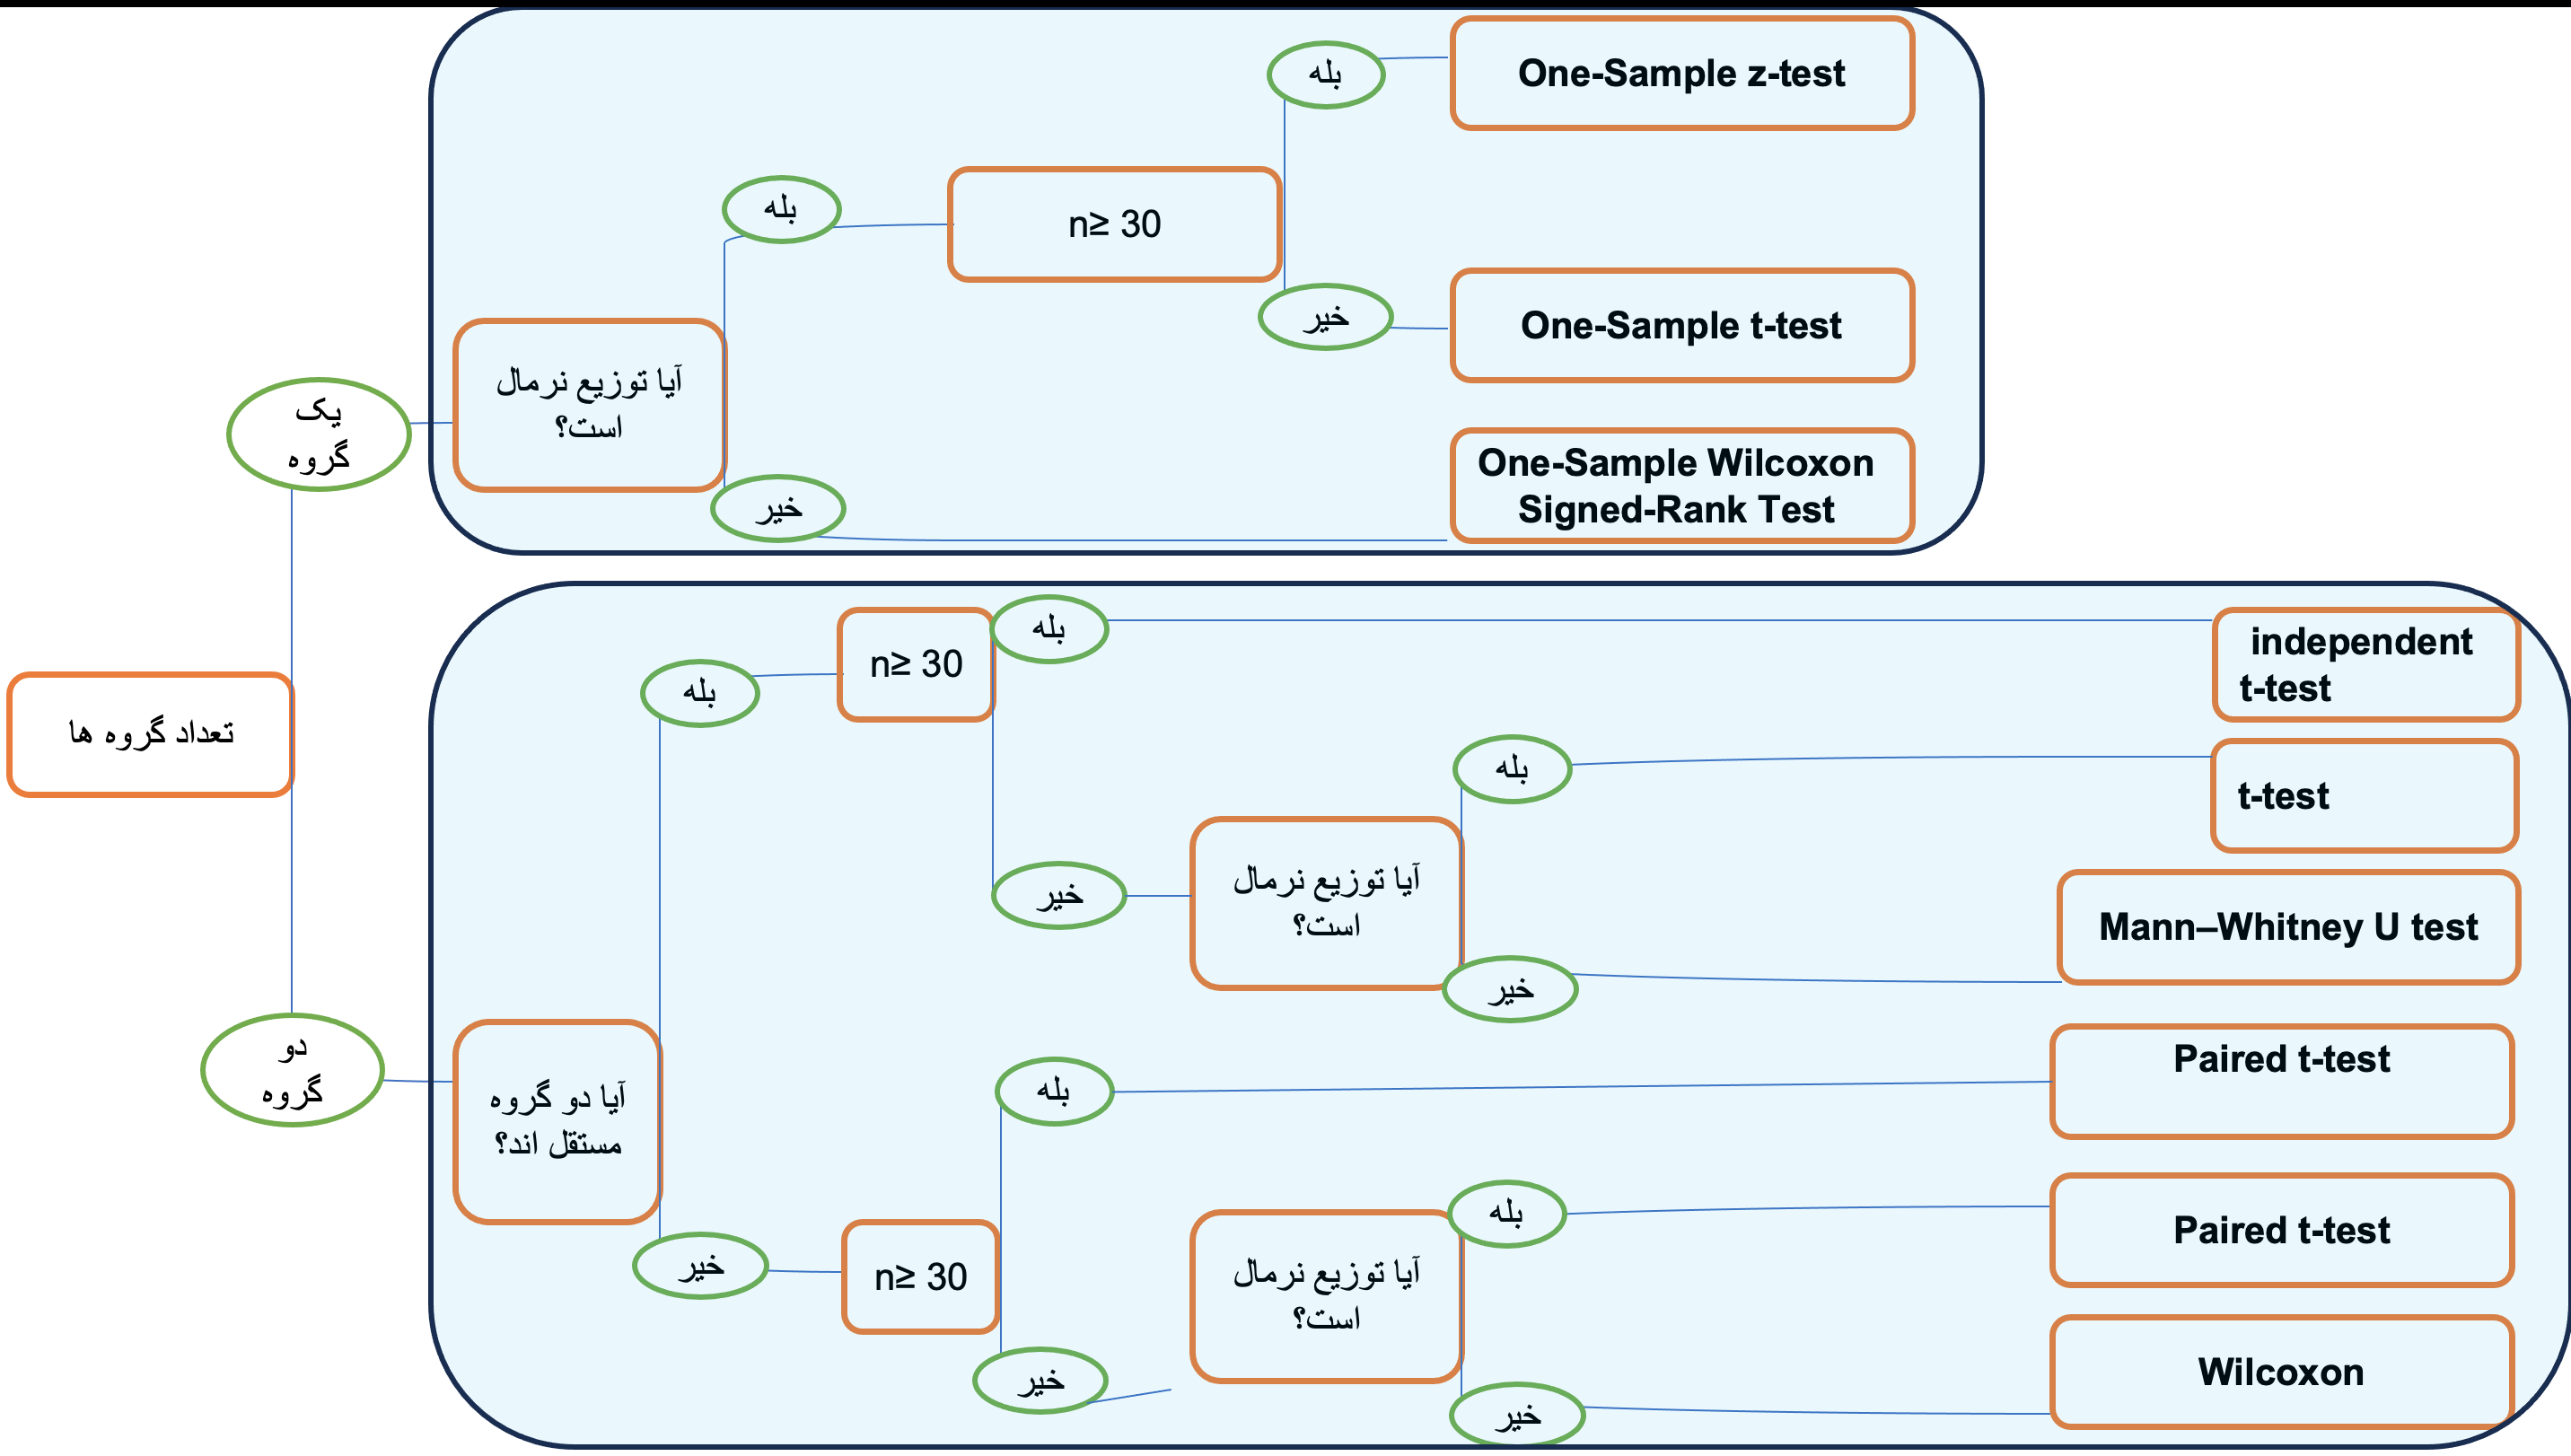

#Parametric: one-sample t-test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import shapiro, kstest, levene, f_oneway

df= pd.read_csv("/content/One_sample_normal.csv")
df

,Unnamed: 0,CO2_Concentration_ppm
0,0,412.649014
1,1,412.458521
2,2,412.694307
3,3,412.956909
4,4,412.429754
5,5,412.429759
6,6,412.973764
7,7,412.730230
8,8,412.359158
9,9,412.662768


###Normality check

### Step 1: Normality test




In [4]:
# Function to select normality test based on sample size
def normality_test(data, threshold=50):
    """Perform Shapiro-Wilk if n < threshold, otherwise Kolmogorov-Smirnov."""
    n = len(data)
    if n < threshold:
        stat, p_value = shapiro(data)
        test = "Shapiro-Wilk"
    else:
        # Use actual mean and std for Kolmogorov-Smirnov
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        stat, p_value = kstest(data, 'norm', args=(mean, std))
        test = "Kolmogorov-Smirnov"
    return test, stat, p_value


In [5]:
group_data = df['CO2_Concentration_ppm']

test, stat, p_value = normality_test(group_data)
print(f"{'CO2_Concentration_ppm'} ({test}): Statistic={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
        print(f"Data is normally distributed (fail to reject H0).")
else:
        print(f"Data is not normally distributed (reject H0).")

CO2_Concentration_ppm (Kolmogorov-Smirnov): Statistic=0.0479, p-value=0.9981
Data is normally distributed (fail to reject H0).


####box-plot and Q-Q plot

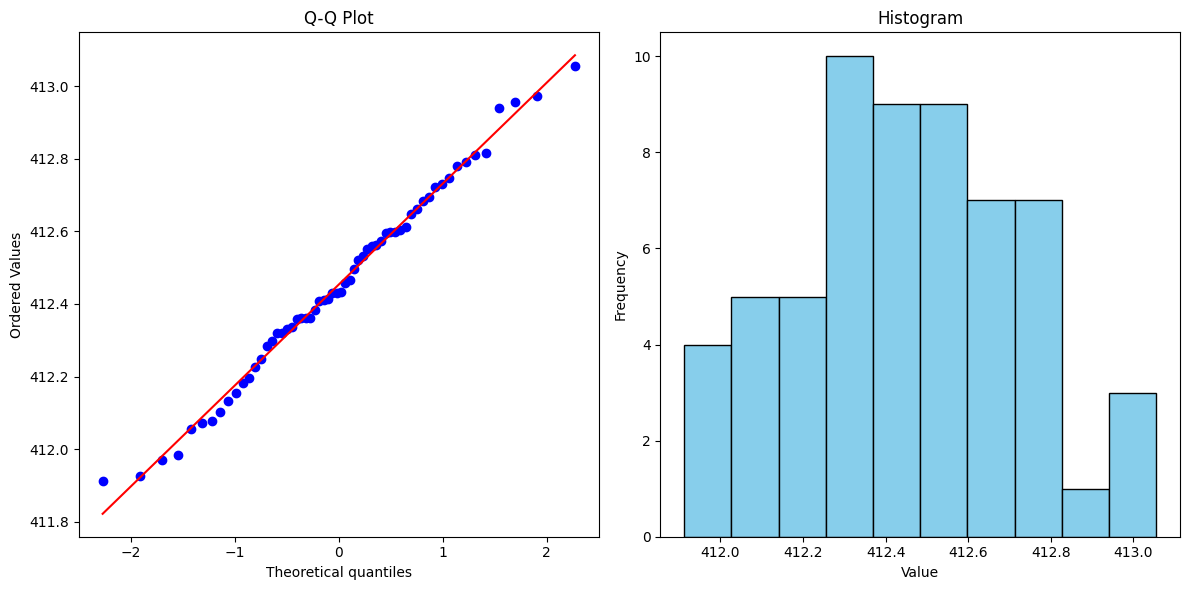

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot
stats.probplot(group_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot")

# Histogram
axes[1].hist(group_data, bins=10, color='skyblue', edgecolor='black')
axes[1].set_title("Histogram")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()


##Step 1: Set Up the Data and Hypotheses

In [17]:
import numpy as np
from scipy import stats

#  global atmospheric CO2 concentration is approximately 419-422 ppm (parts per million)
population_mean = 420


##Step 2: Calculate the Sample Mean and Standard Deviation

In [18]:

# Calculate sample statistics
sample_mean = group_data.mean()
sample_std = group_data.std(ddof=1)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

Sample Mean: 412.4536035950788
Sample Standard Deviation: 0.2725563362466357


##Step 3: Calculate the t-Statistic and p-value

In [19]:

n = len(group_data)

# Perform One-Sample t-Test
t_statistic, p_value = stats.ttest_1samp(group_data, population_mean)



##Step 5: Interpret the Results

In [21]:

# Interpretation
alpha = 0.05
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Sample Mean: 412.4536035950788
Sample Standard Deviation: 0.2725563362466357
T-Statistic: -214.4662494559793
P-Value: 4.880627502951931e-87
Reject the null hypothesis.


# Non-parametric : One-sample Wilcoxon signed-rank test

## Import data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import shapiro, kstest, levene, f_oneway

df= pd.read_csv("/content/One_sample_non_normal.csv")
df

,Subject,Blood_Pressure_mmHg
0,1,135
1,2,140
2,3,138
3,4,145
4,5,150
5,6,130
6,7,128
7,8,142
8,9,137
9,10,136


## Normality test




In [7]:
# Function to select normality test based on sample size
def normality_test(data, threshold=50):
    """Perform Shapiro-Wilk if n < threshold, otherwise Kolmogorov-Smirnov."""
    n = len(data)
    if n < threshold:
        stat, p_value = shapiro(data)
        test = "Shapiro-Wilk"
    else:
        # Use actual mean and std for Kolmogorov-Smirnov
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        stat, p_value = kstest(data, 'norm', args=(mean, std))
        test = "Kolmogorov-Smirnov"
    return test, stat, p_value

In [8]:
test, stat, p_value = normality_test(df)
print(f"{'Blood_Pressure_mmHg'} ({test}): Statistic={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
        print(f"Data is normally distributed (fail to reject H0).")
else:
        print(f"Data is not normally distributed (reject H0).")

Blood_Pressure_mmHg (Shapiro-Wilk): Statistic=0.7218, p-value=0.0000
Data is not normally distributed (reject H0).


## One-sample Wilcoxon signed-rank test

In [9]:
import numpy as np
from scipy.stats import wilcoxon

# This data represents blood pressure readings taken from patients before treatment
before_treatment = df['Blood_Pressure_mmHg']

# Hypothetical median: Normal blood pressure value (120 mmHg)
hypothetical_median = 120

# Calculate the differences between the observed readings and the hypothetical median
differences = before_treatment - hypothetical_median

# Perform the Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(differences)

# Results
print("=== Wilcoxon Signed-Rank Test ===")
print(f"Test Statistic (W): {stat}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: The blood pressure is significantly different from 120 mmHg.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 120 mmHg.")


=== Wilcoxon Signed-Rank Test ===
Test Statistic (W): 0.0
p-value: 0.0000
Reject the null hypothesis: The blood pressure is significantly different from 120 mmHg.
